In [1]:
import numpy as np
import matplotlib.pyplot as plt
from occident.utils import load_deepcell_object

## Set Preferences

In [ ]:
conditions = ['Safe Harbor KO', 'RASA2 KO', 'CUL5 KO']
colors = {'Safe Harbor KO': '#a9a9a9', 
          'RASA2 KO': '#800000',
          'CUL5 KO': '#000075'}


In [ ]:
SH = ['B3', 'B4', 'B5', 'B6']
RASA2 = ['E3', 'E4', 'E5', 'E6']
CUL5 = ['B7', 'B8', 'B9', 'B10']

In [ ]:
lower_lim = 50
upper_lim = 350

In [ ]:
data_dir = '/gladstone/engelhardt/lab/MarsonLabIncucyteData/AnalysisFiles/CarnevaleRepStim/updated_full'

## Get cancer cell sizes from segmentations

In [ ]:
def get_all_sizes(dcl_ob):
    cancer_cells = dcl_ob['y'][1,:,:,0,:]
    sizes = np.concatenate([np.unique(cancer_cells[i],return_counts = True)[1][1:] for i in range(lower_lim, upper_lim)])
    return sizes

In [7]:
all_sh = []
for i in range(4):
    sh_ob = load_deepcell_object(data_dir + '/cart_' + SH[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    all_sh.append(get_all_sizes(sh_ob))
all_sh = np.concatenate(all_sh)

In [8]:
all_rasa = []
for i in range(4):
    sh_ob = load_deepcell_object(data_dir + '/cart_' + RASA2[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    all_rasa.append(get_all_sizes(sh_ob))
all_rasa = np.concatenate(all_rasa)

In [9]:
all_cul = []
for i in range(4):
    sh_ob = load_deepcell_object(data_dir + '/cart_' + CUL5[i] + '_start_0_end_350_nuc_15_cyto_75.zip')
    all_cul.append(get_all_sizes(sh_ob))
all_cul = np.concatenate(all_cul)

In [ ]:
factor = 746/599 # convert pixels to microns

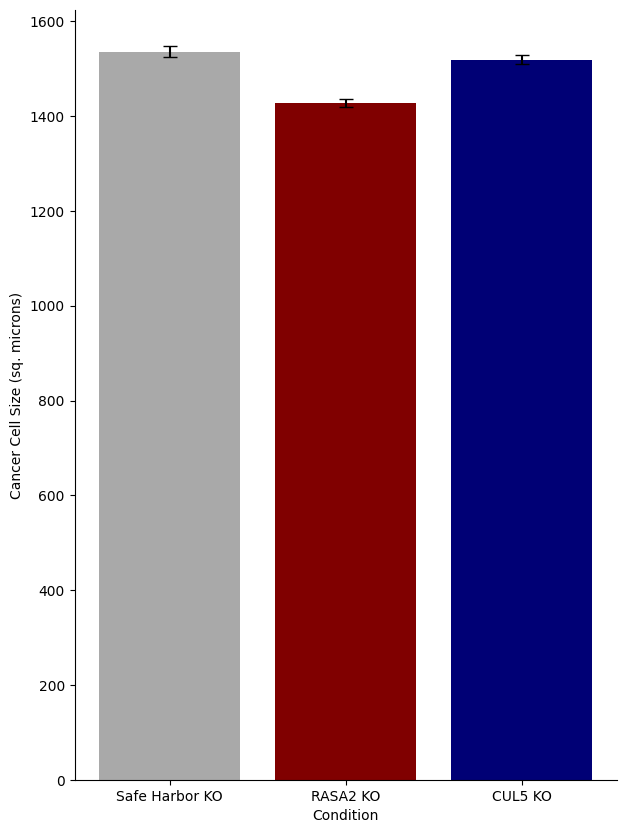

In [11]:
fig, ax = plt.subplots(1,1,figsize = (7,10))
ax.bar(np.arange(3),
       factor**2 * np.array([np.mean(all_sh), np.mean(all_rasa), np.mean(all_cul)]),
       yerr = factor**2 * 1.96 * np.array([np.std(all_sh)/np.sqrt(len(all_sh)), np.std(all_rasa)/np.sqrt(len(all_rasa)), np.std(all_cul)/np.sqrt(len(all_cul))]),
       capsize = 5,
       color = [colors[i] for i in conditions])
ax.set_xticks(np.arange(3), conditions)
ax.set_xlabel('Condition')
#ax.set_ylim([1000, 1600])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Cancer Cell Size (sq. microns)')
plt.show()

## Compared with two-sided t-test of the mean

In [12]:
from scipy.stats import ttest_ind

### SH/RASA

In [13]:
ttest_ind(all_sh, all_rasa)

TtestResult(statistic=15.16041918910148, pvalue=6.775641858047901e-52, df=284193.0)

### SH/CUL

In [14]:
ttest_ind(all_sh, all_cul)

TtestResult(statistic=2.2718692139726557, pvalue=0.02309519779407838, df=268668.0)

### RASA/CUL

In [15]:
ttest_ind(all_rasa, all_cul)

TtestResult(statistic=-13.470279136412081, pvalue=2.415018307582036e-41, df=262861.0)